In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.isnull

<bound method DataFrame.isnull of      sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status    salary
0        1      M  67.00   Others  ...          Mkt&HR  58.80      Placed  270000.0
1        2      M  79.33  Central  ...         Mkt&Fin  66.28      Placed  200000.0
2        3      M  65.00  Central  ...         Mkt&Fin  57.80      Placed  250000.0
3        4      M  56.00  Central  ...          Mkt&HR  59.43  Not Placed       NaN
4        5      M  85.80  Central  ...         Mkt&Fin  55.50      Placed  425000.0
..     ...    ...    ...      ...  ...             ...    ...         ...       ...
210    211      M  80.60   Others  ...         Mkt&Fin  74.49      Placed  400000.0
211    212      M  58.00   Others  ...         Mkt&Fin  53.62      Placed  275000.0
212    213      M  67.00   Others  ...         Mkt&Fin  69.72      Placed  295000.0
213    214      F  74.00   Others  ...          Mkt&HR  60.23      Placed  204000.0
214    215      M  62.00  Central  ...    

In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df.head

<bound method NDFrame.head of      sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status    salary
0        1      M  67.00   Others  ...          Mkt&HR  58.80      Placed  270000.0
1        2      M  79.33  Central  ...         Mkt&Fin  66.28      Placed  200000.0
2        3      M  65.00  Central  ...         Mkt&Fin  57.80      Placed  250000.0
3        4      M  56.00  Central  ...          Mkt&HR  59.43  Not Placed       NaN
4        5      M  85.80  Central  ...         Mkt&Fin  55.50      Placed  425000.0
..     ...    ...    ...      ...  ...             ...    ...         ...       ...
210    211      M  80.60   Others  ...         Mkt&Fin  74.49      Placed  400000.0
211    212      M  58.00   Others  ...         Mkt&Fin  53.62      Placed  275000.0
212    213      M  67.00   Others  ...         Mkt&Fin  69.72      Placed  295000.0
213    214      F  74.00   Others  ...          Mkt&HR  60.23      Placed  204000.0
214    215      M  62.00  Central  ...        

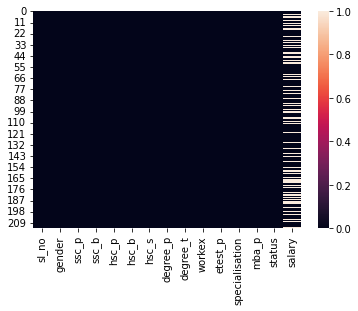

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.fillna(df.mean(),inplace=True)

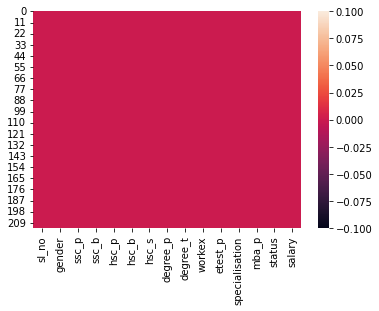

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.corr()['salary'].sort_values(ascending=False)

salary      1.000000
etest_p     0.152829
mba_p       0.146324
hsc_p       0.054506
sl_no       0.051550
ssc_p       0.023571
degree_p   -0.014148
Name: salary, dtype: float64

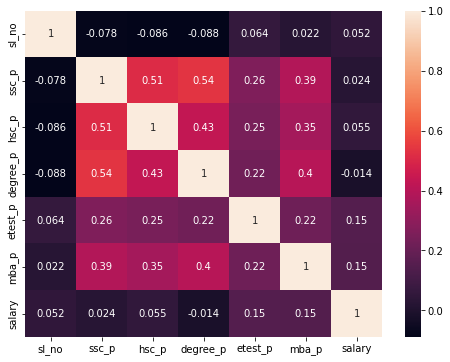

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df[['mba_p','etest_p','ssc_p']]
y=df['status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Knn = KNeighborsClassifier(11)

In [ ]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = Knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Not Placed       0.83      0.45      0.59        22
      Placed       0.80      0.96      0.87        49

    accuracy                           0.80        71
   macro avg       0.81      0.71      0.73        71
weighted avg       0.81      0.80      0.78        71



In [ ]:
df.shape

(215, 15)

In [ ]:
215/5

43.0

In [ ]:
43*4

172

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Ks = list(range(1,150,2))

In [ ]:
scores = []

In [ ]:
for k in ks:
  knn = KNeighborsClassifier(k)
  score = cross_val_score(knn,x,y,cv=5,scoring="accuracy").mean()
  scores.append(score)
  print(f"{k}")

SyntaxError: ignored